# PyTorch Custom Datasets
* Notebook by Adam Lang
* Date: 4/10/2025

# Overview
* This notebook is based on the concepts taught in Daniel Bourke's PyTorch for Deep Learning Bootcamp on Udemy.

* Although I have been coding in PyTorch since 2022, I continually review and brush up on my torch skills and Daniel Bourke is the best in the business at teaching tips and tricks to make you a PyTorch guru.

* As the great Kobe Bryant once said:
```
Mamba Mentality means "to constantly try to be the best version of yourself. It's a constant quest to try to better today than you were yesterday."
```
```
“Why do you think I’m the best player in the world? Because I never ever get bored with the basics.”
```

## How do you get your own data into PyTorch?
* The easiest way is to use pre-built datasets from PyTorch or from Hugging Face which are pre-formatted.

* However, one of the best ways to do this to use the PyTorch custom datasets!

## Domain Libraries for Custom Datasets and DataLoaders
* Some of these include:

1. `torchvision`
2. `torchaudio`
3. ...etc...

## 0. Importing PyTorch and setting up device agnostic code
* This is like brushing your teeth, always start with this!

In [1]:
import torch
from torch import nn

# check torch version > 1.10.0
print(f"Torch version: {torch.__version__}")

Torch version: 2.6.0+cu124


In [2]:
## setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Wed Apr 30 00:15:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Summary
* I am using a Tesla T4 GPU

## Dataset Prep
* The dataset that Daniel used in his original notebooks was "The Food-101 Data Set".
* The original dataset was created by ETH-Zurich and as they describe it:
```
"We introduce a challenging data set of 101  food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images."
```
* Link to original dataset: https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

### Breaking down the data
* Since the dataset has **101 classes or categories that can take a lot of time and compute power.**
* So for the purposes of this exercise, Daniel wrote a script to breakdown the dataset into:
* **3 classes instead of 101**
* **10% of the original number of images**

* This is a very common approach that I learned to use in machine learning is to **start small with ~10 to 20% of your data with random samples or any other sampling technique** and **then go big with any problem you are solving.**
* The code that Daniel used to cut down the BIG DATA set is here for reference and good template for anyone that wants to have a starting point for building datasets in the future: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb

## 1. Get the Data
* Now let's get the smaller cut down version of this dataset that Daniel crafted for these experiments.
* The dataset metrics are now:

```
1. 3 classes of food
2. 10% of total images
3. ~75% training | ~25% testing
```

In [5]:
## get the data
import requests
import zipfile ## data is in a zipfile
from pathlib import Path

## 1. setup a path to data folder location
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

## 2. if image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists...skipping download")
else:
  print(f"{image_path} does not exist, creating one....")
  image_path.mkdir(parents=True, exist_ok=True)


## 3. Download the dataset -- zip file, write binary
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  ## get dataset -- should be "raw file"
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  ## write request --> target file
  f.write(request.content)

## 4. Unzip dataset --> read target file
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping dataset.....")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists...skipping download
Unzipping dataset.....


## 2. Exploratory Data Analysis
* Data preparation & exploration.

### Walk through image/file directories

In [6]:
import os

## function to walk through each of the data directories
def walk_through_dir(dir_path):
  """Function walks through dir_path returning the contents."""
  ## loop through target directory
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [7]:
## use function
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [8]:
# setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

## print train and test
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

#### Standard image classification dataset format
* This is an awesome chart from Daniel Bourke's lecture showing the standard format that you want for a computer vision project.
* This is especially handy because with computer vision projects we are handling a lot of unstructured data (images) in a directory format which is much different than simply loading a CSV file in standard data science workflows.

* Image credit: Mr. Daniel Bourke

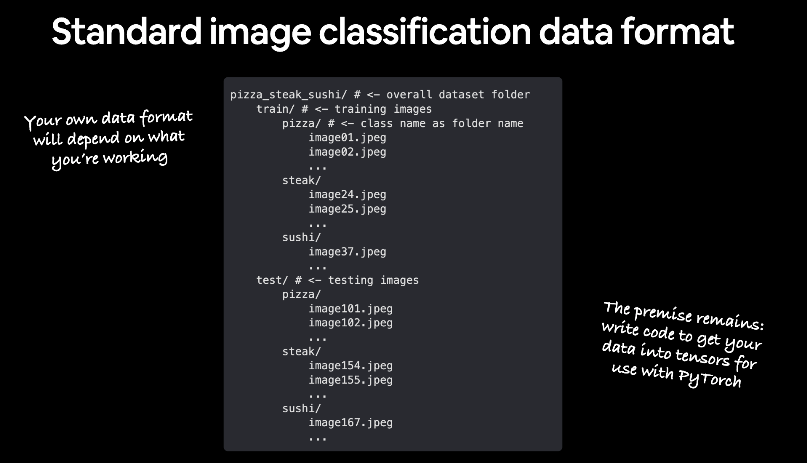

Summary
1. Goal is still the same: Get data into tensors for deep learning.

2. Where did the format come from?
  * PyTorch documentation is where the above format came from.
  * Here are the docs: https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

### 2.1 Visualizing an Image

Let's write code to:
1. Get all of image paths
2. Pick a random image path using Python's `random.choice()`
3. Get image class name using `pathlib.Path.parent.stem`
4. Since we're working with images let's open the image with Python's PIL (Pillow) library.
  * https://pillow.readthedocs.io/en/stable/
5. We'll then show the image and print metadata.

In [9]:
image_path

PosixPath('data/pizza_steak_sushi')

Random image path: data/pizza_steak_sushi/train/sushi/821108.jpg
Image class: sushi
Image height: 383
Image width: 512


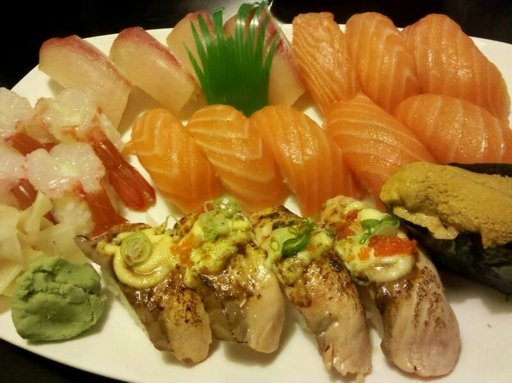

In [10]:
import random
from PIL import Image

# set seed
#random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
#print(random_image_path)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
#print(image_class)


# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Visualize with Matplotlib

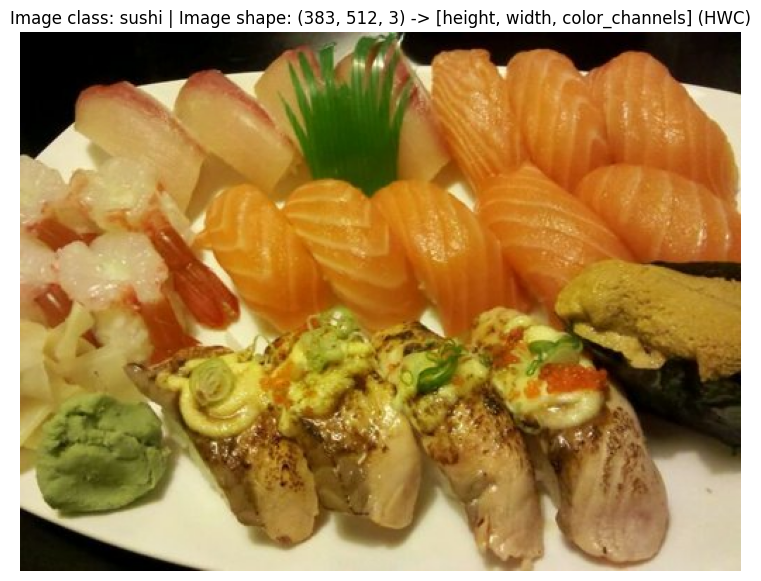

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

# turn image into array
img_as_array = np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False)
plt.show();

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   7],
        [  3,   2,   7],
        [  2,   1,   6]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   7],
        [  5,   4,   9],
        [  5,   4,   9]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   5],
        [  6,   6,   8],
        [  7,   7,   9]],

       ...,

       [[ 18,  14,   2],
        [ 18,  14,   2],
        [ 18,  14,   2],
        ...,
        [220, 209, 181],
        [220, 209, 181],
        [219, 208, 180]],

       [[ 16,  12,   0],
        [ 17,  13,   1],
        [ 18,  14,   2],
        ...,
        [220, 209, 181],
        [219, 208, 180],
        [219, 208, 180]],

       [[ 16,  12,   0],
        [ 17,  13,   1],
        [ 18,  14,   2],
        ...,
        [220, 209, 181],
        [219, 208, 180],
        [218, 207, 179]]], dtype=uint8)
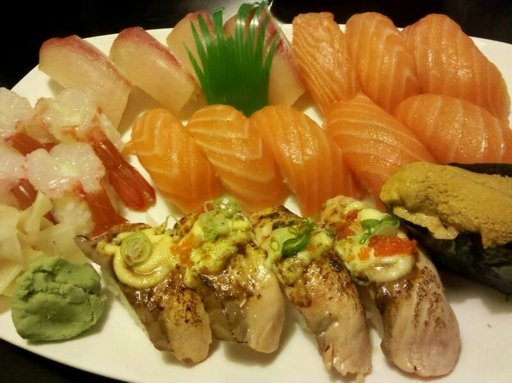

In [12]:
img_as_array

## 3. Transforming Data

Before we can use our image data with PyTorch:
1. Turn target data into tensors (in our case, numerical representation of images).

2. Turn it into `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`. We will call these:
  * `Dataset`
  * `DataLoader`

In [13]:
## create a transform
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`
* Transforms help you get your images ready to be used with a model/perform data augmentation.
* Docs: https://pytorch.org/vision/0.9/transforms.html

In [14]:
## write a transform for image
# data_transform = nn.Sequential() ## --> can do this too
data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(224, 224)),
    # Flip images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), ## 50% of time image flipped on horizontal axis
    # Turn image into torch.Tensor
    transforms.ToTensor()

])

In [15]:
data_transform(img).shape

torch.Size([3, 224, 224])

Summary
* Note: The Torchvision transform converts the image to color channels FIRST.
* Matplotlib however, prefers color channels last!

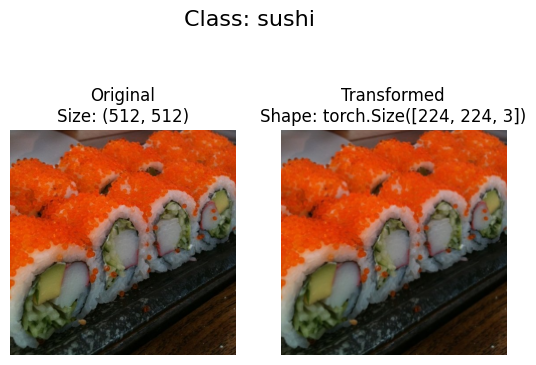

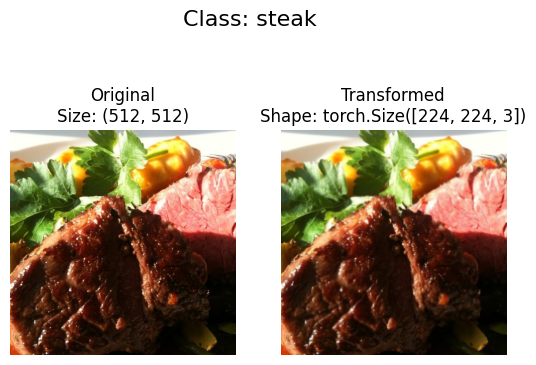

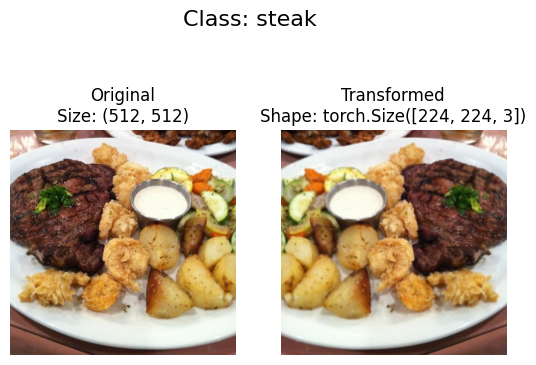

In [16]:
## create a function to plot the transformed images
def plot_transformed_images(image_paths,
                            transform,
                            n=3,
                            seed=None):
  """
  Selects random images from a path of images and loads/transforms them
  then plots the original vs. transformed version.
  """
  ## set seed
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    ## open image
    with Image.open(image_path) as f:
      ## create subplots --> rows, cols
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image -- side by side orig vs. transform
      ## (C, H, W) -> (H, W, C) -- permute will do this
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


## plot transformed images
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

Summary
* The transformed images are now in **tensors** so we can augment and manipulate them.

## 4. Option 1: Loading Image data using `ImageFolder`

* We can load image classification data using `torchvision.datasets.ImageFolder`

* Docs: https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

In [17]:
# use ImageFolder to create dataset(s)
from torchvision import datasets

## load train_data with `ImageFolder`
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target


## load test data with `ImageFolder`
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)


## print out both train and test
train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [18]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [19]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [20]:
# Get class names as dictionary
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [21]:
# Check the lengths of our dataset
len(train_data), len(test_data)

(225, 75)

In [22]:
## first sample
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [23]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1176, 0.1255,  ..., 0.1098, 0.1098, 0.1098],
         [0.1176, 0.1137, 0.1137,  ..., 0.1176, 0.1176, 0.1137],
         [0.1137, 0.1176, 0.1098,  ..., 0.1216, 0.1255, 0.1216],
         ...,
         [0.0941, 0.0902, 0.0863,  ..., 0.1725, 0.1725, 0.1804],
         [0.0902, 0.0902, 0.0902,  ..., 0.1647, 0.1686, 0.1686],
         [0.0863, 0.0863, 0.0824,  ..., 0.1490, 0.1529, 0.1529]],

        [[0.0706, 0.0745, 0.0824,  ..., 0.0549, 0.0549, 0.0549],
         [0.0745, 0.0706, 0.0706,  ..., 0.0627, 0.0627, 0.0588],
         [0.0706, 0.0784, 0.0667,  ..., 0.0627, 0.0667, 0.0627],
         ...,
         [0.1098, 0.1059, 0.1020,  ..., 0.2353, 0.2314, 0.2314],
         [0.1059, 0.1059, 0.1059,  ..., 0.2275, 0.2314, 0.2314],
         [0.1020, 0.1020, 0.0980,  ..., 0.2196, 0.2235, 0.2235]],

        [[0.0941, 0.0980, 0.1059,  ..., 0.0196, 0.0196, 0.0196],
         [0.0980, 0.0941, 0.0941,  ..., 0.0235, 0.0235, 0.0196],
         [0.0941, 0.0980, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute: torch.Size([224, 224, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

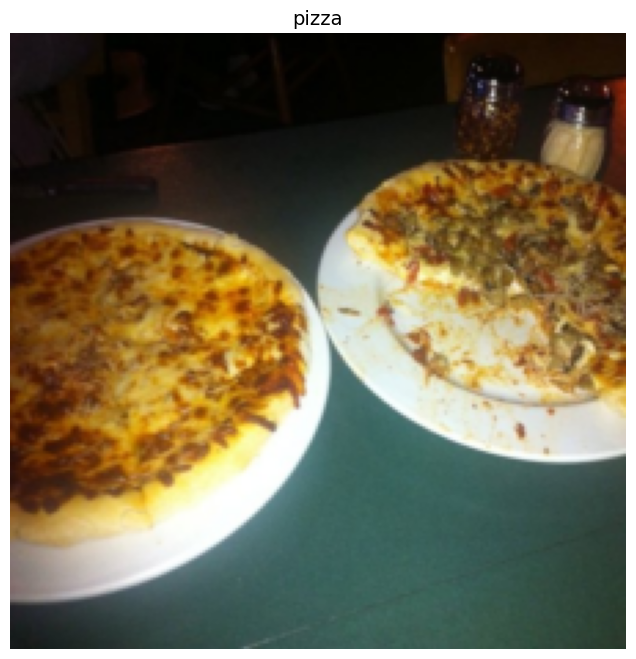

In [24]:
## rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(12,8))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

## 4.1 Turn loaded images into `DataLoader`'s

* A `DataLoader` is going to help us turn our `Dataset`'s into iterables and we can customize the `batch_size` so our model can see `batch_size` images at a time.


In [25]:
!nvidia-smi

Wed Apr 30 00:16:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Note:
* This technique is used for ALL data handling in PyTorch whether it is:
  * Images
  * Text
  * Audio
  * ...etc..

In [26]:
import os
## how many cpu instances are available
os.cpu_count()

2

In [27]:
# Turn train and test datasets into DataLoader's
from torch.utils.data import DataLoader

BATCH_SIZE=1
## setup train_dataloader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

## setup test dataloader
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

## view both sets
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x784b00fc80d0>,
 <torch.utils.data.dataloader.DataLoader at 0x784b00ff6310>)

Summary
* We now have 2 instances of the train and test dataloaders which are iterators for our data.

In [28]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [29]:
len(train_data), len(test_data)

(225, 75)

In [30]:
225/32

7.03125

### Plot image from dataloader

In [31]:
## iterate through train dataloader
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]\n")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 224, 224]) -> [batch_size, color_channels, height, width]

Label shape: torch.Size([1])


## 5. Option 2: Loading Image Data with a Custom PyTorch `Dataset`

1. Want to be able to load images from file.

2. Want to be able to get class names from the Dataset.

3. Want to be able to get classes as **dictionary** from the Dataset

### Pros of Custom Dataset

1. Can create a `Dataset` out of almost anything.

2. Not limited to PyTorch pre-built `Dataset` functions.

### Cons of Custom Dataset

1. Even though you could create a `Dataset` out of almost anything, it doesn't mean it will work...

2. Using a custom `Dataset` often results in us writing more code, which could be prone to errors or performance issues!


All custom datasets in Pytorch, often subclass this: https://pytorch.org/docs/stable/data.html

In [32]:
import os
import pathlib ## file paths
import torch

from PIL import Image ## opening images
from torch.utils.data import Dataset
from torchvision import transforms ## transform images to tensors
from typing import Tuple, Dict, List ## type hints for loading functions



In [33]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

* We want a function to:

1. Get the class names using `os.scandir()` to traverse a target directory
  * Ideally the directory is in standard image classification format

2. Raise an error if the class names aren't found.
  * If this happens there might be something wrong with the directory structure.

3. Turn the class names into a dict and a list and return them.

In [34]:
# Setup path directory for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get class names from target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [35]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [36]:
## functionize this
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """
  Finds the class folder names in a target directory.
  """
  ## 1. Get class names by scanning target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  ## 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}...please check file structure.")

  ## 3. Create dictionary of index labels -- computers prefer numbers rather than strings as labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx

In [37]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder` from PyTorch

To create our own custom dataset, we want to:

1. Subclass `torch.utils.data.Dataset`

2. Init the subclass with a **target directory**
  * The directory we want to get data from
  * As well as a transform if we want to get data

3. Create several attributes:
  * paths -> paths of our images
  * transform -> the transform we'd like to use
  * classes -> list of the target classes
  * class_to_idx -> dict of target classes mapped to integer labels

4. Create a function to `load_images()`
  * This function will **open an image**

5. Overwrite the `__len__()` method
  * We will do this to return the length of our dataset

6. Overwrite the `__getitem__()` method
  * We will do this to return a given sample when passed an index

In [38]:
# Write a custom dataset class
## 0. imports
from torch.utils.data import Dataset

## 1. Subclass torch.utils.data.Dataset -- inherits from `Dataset`
class ImageFolderCustom(Dataset):
  # 2. Initialize custom dataset -- pass in: target directory, transform method
  def __init__(self,
               targ_dir: str,
               transform=None):

    # 3. Create class attributes
    # get all image paths --> ending in `.jpg`
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))

    # Setup transforms
    self.transform = transform

    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)


  # 4. Create function to load images --> Image from PIL library
  def load_image(self, index: int) -> Image.Image:
    """Opens an image via a path and returns it."""
    image_path = self.paths[index]

    return Image.open(image_path)

  # 5. Overwrite __len__() method
  def __len__(self) -> int:
    """Returns the total number of samples."""
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    """Returns one sample of data, data and label (X, y)."""
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform target image if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image and label

In [39]:
img, label = train_data[0]

In [40]:
img, label

(tensor([[[0.1137, 0.1176, 0.1255,  ..., 0.1098, 0.1098, 0.1098],
          [0.1176, 0.1137, 0.1137,  ..., 0.1176, 0.1176, 0.1137],
          [0.1137, 0.1176, 0.1098,  ..., 0.1216, 0.1255, 0.1216],
          ...,
          [0.0941, 0.0902, 0.0863,  ..., 0.1725, 0.1725, 0.1804],
          [0.0902, 0.0902, 0.0902,  ..., 0.1647, 0.1686, 0.1686],
          [0.0863, 0.0863, 0.0824,  ..., 0.1490, 0.1529, 0.1529]],
 
         [[0.0706, 0.0745, 0.0824,  ..., 0.0549, 0.0549, 0.0549],
          [0.0745, 0.0706, 0.0706,  ..., 0.0627, 0.0627, 0.0588],
          [0.0706, 0.0784, 0.0667,  ..., 0.0627, 0.0667, 0.0627],
          ...,
          [0.1098, 0.1059, 0.1020,  ..., 0.2353, 0.2314, 0.2314],
          [0.1059, 0.1059, 0.1059,  ..., 0.2275, 0.2314, 0.2314],
          [0.1020, 0.1020, 0.0980,  ..., 0.2196, 0.2235, 0.2235]],
 
         [[0.0941, 0.0980, 0.1059,  ..., 0.0196, 0.0196, 0.0196],
          [0.0980, 0.0941, 0.0941,  ..., 0.0235, 0.0235, 0.0196],
          [0.0941, 0.0980, 0.0902,  ...,

In [41]:
# Create a transform of the train images
from torchvision import transforms

## train transforms
train_transforms = transforms.Compose([
                                        transforms.Resize(size=(64, 64)),
                                        transforms.RandomHorizontalFlip(p=0.5),
                                        transforms.ToTensor() ## convert to tensor


])
## test transforms
test_transforms = transforms.Compose([
                                      transforms.Resize(size=(64, 64)),
                                      transforms.ToTensor() ## convert to tensor

])

In [42]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms,
                                      )

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [43]:
## view outputs
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x784b01239750>,
 <__main__.ImageFolderCustom at 0x784b00fa6910>)

In [44]:
len(train_data), len(train_data_custom)

(225, 225)

In [45]:
len(test_data), len(test_data_custom)

(75, 75)

In [46]:
## look at train data custom
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [47]:
## view label dict
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [48]:
# check for equality between original ImageFolder Dataset and ImageFolderCustomDataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


### 5.3 Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.

2. To prevent the display getting out of hand, let's cap the number of images to see at 10.

3. Set the random seed for reproducibility.

4. Let's get a list of random sample indexes from the target dataset.

5. Setup a matplotlib plot

6. Loop through the random sample images and plot them with matplotlib.

7. Make sure the dimensions of our images lineup with matplotlib.

In [49]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes, n should not be larger than 10, setting it to 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  ## randomly sample images from the length of dataset
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(20, 10))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    ## image, label --> targ_sample index 0, targ_sample index 1 (label)
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]

    # Plot adjusted samples --> 1 row of n images, count with i+1
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust) ## plot image
    plt.axis("off") ## turn off axis
    ## if target label exists-->adjust to target label
    if classes:
      title = f"Class: {classes[targ_label]}"
    if display_shape:
      title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

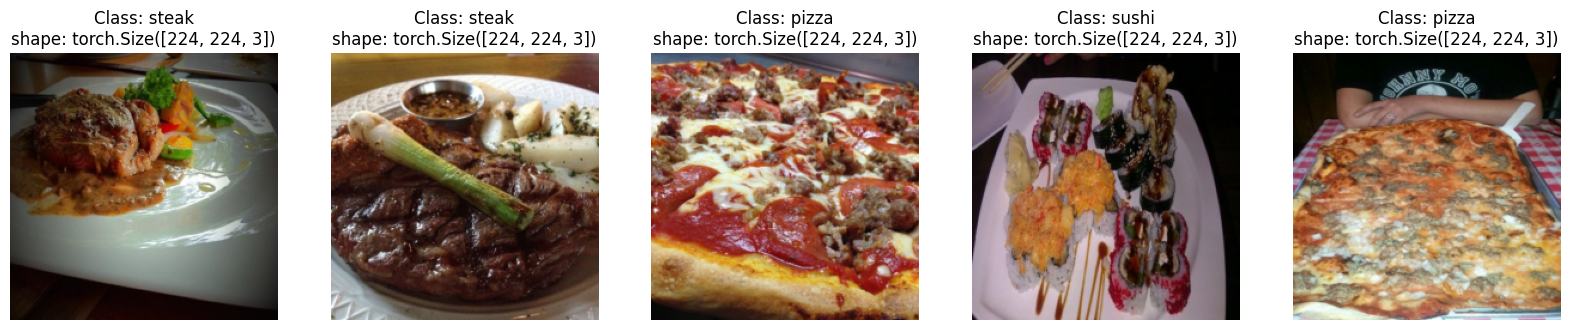

In [50]:
## display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

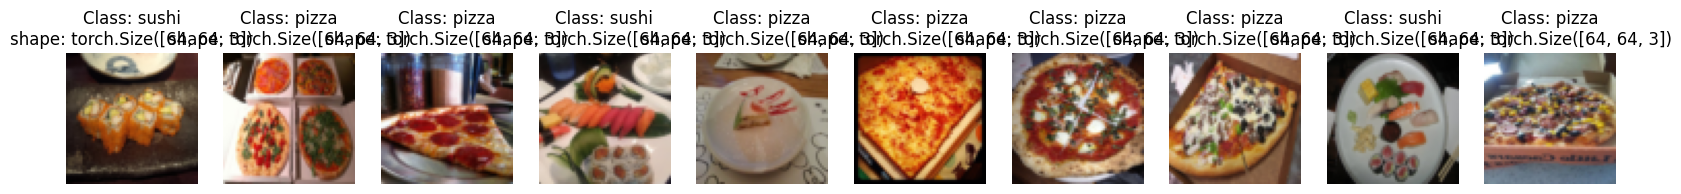

In [51]:
## Display random images from the ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=10,
                      classes=class_names,
                      seed=42)

### 5.4 Turn Custom loaded images into `DataLoader`s
* `num_workers` - specifies the number of processes to run to load the data.

In [52]:
from torch.utils.data import DataLoader

## set batch size
BATCH_SIZE=64
NUM_WORKERS = os.cpu_count()

## train dataloader
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True
                                    )

## test dataloader custom
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False) ## dont shuffle test data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x784b01005210>,
 <torch.utils.data.dataloader.DataLoader at 0x784b00f1d350>)

In [53]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# print out shapes
img_custom.shape, label_custom.shape

(torch.Size([64, 3, 64, 64]), torch.Size([64]))

## 6. Other forms of transforms (data augmentation)
* The goal is to enhance the diversity of your training data to perform better on real world data.

* Data augmentation is the process of artificially adding diversity to your training data.

* In the case of image data, this may mean rotating the images various ways to get different "views" of the image such as:
  1. Rotation transform
  2. Shift transform
  3. Zoom transform
  4. ...etc...

* This practice hopefully results in a model that's more generalizable to unseen data.


* Lets take a look at 1 particular type of data augmentation used to train PyTorch vision models to state of the art levels....

* PyTorch blog post: https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/


* TrivialAugment

Paper: Mueller, Hutter (Aug 2021). TrivialAugment: Tuning-free Yet State-of-the-Art Data Augmentation, https://arxiv.org/abs/2103.10158.
Implementation: torchvision.transforms.TrivialAugmentWide

* Read Sebastian Raschka's blog: https://sebastianraschka.com/blog/2023/data-augmentation-pytorch.html

In [54]:
# lets look at trivial-augment
from torchvision import transforms

## train transform - original paper: https://arxiv.org/abs/2103.10158
train_transform = transforms.Compose([
                                        transforms.Resize(size=(224, 224)), ## resize
                                        transforms.TrivialAugmentWide(num_magnitude_bins=31), ## augmentation method
                                        transforms.ToTensor() ## to tensor


])

## test transforms
test_transform = transforms.Compose([
                                      transforms.Resize(size=(224, 224)), ## resize
                                      transforms.ToTensor() ## to tensor

])

In [55]:
image_path

PosixPath('data/pizza_steak_sushi')

In [56]:
# get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/138855.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1033251.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2382016.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/715169.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2760984.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/220190.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/741883.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/12301.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/5764.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1044789.jpg')]

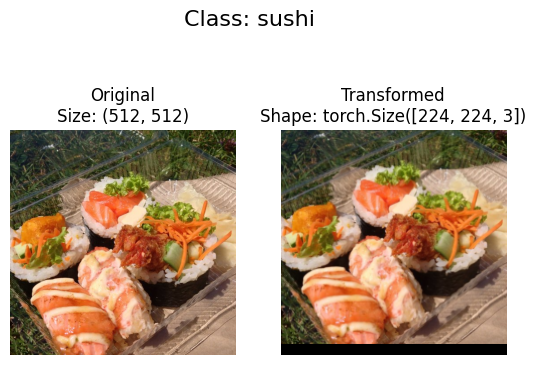

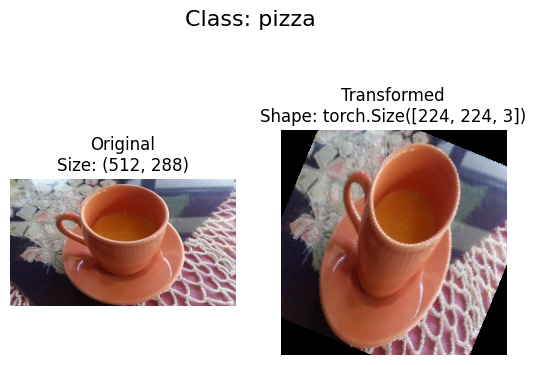

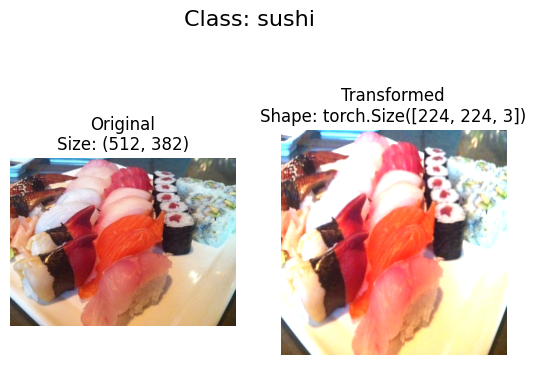

In [57]:
# plot transformed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform, # transform above
    n=3,
    seed=None
)

## 7. Model 0: TinyVGG Architecture WITHOUT Data Augmentation
* We will use the TinyVGG architecture.
* This is a great blogpost detailing more about the TinyVGG architecture: https://medium.com/bokchilab/optimizing-the-tinyvgg-model-for-cifar-10-classification-with-mlops-ee8a697eecb5
* This is more about the VGGNet architecture: https://medium.com/@siddheshb008/vgg-net-architecture-explained-71179310050f


### 7.1 Creating Transforms and Load Data for Model 0
* This is the same architecture from the "CNN Explainer" website: https://poloclub.github.io/cnn-explainer/

**Remember we are NOT doing an augmentation in this experiment**

In [58]:
# create simple transform
simple_transform = transforms.Compose([
                                        transforms.Resize(size=(64, 64)),
                                        transforms.ToTensor()
])

In [59]:
# 1. Load and transform data
from torchvision import datasets

## simple train data WITHOUT augmentation
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)


test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)


# 2. Turn datasets --> DataLoaders
import os
from torch.utils.data import DataLoader

## setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

## Create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False, ## dont shuffle for test set
                                    num_workers=NUM_WORKERS)

### 7.2 Create TinyVGG model class
* In a CNN, you typically use `MaxPool2D` after `ReLU` activation and before the classifier layer for several reasons:
  1. Reduce the dimensionality of the feature maps
  2. **Emphasize significant features**
  3. Increase the model's invariance to spatial shifts

* Details

1. **Dimensionality Reduction**
  * `MaxPool2D` downsamples the feature maps, reducing the number of parameters and computational cost.
  * This is crucial as the number of features can become **very large with deeper convolutional layers, potentially leading to overfitting and computational inefficiency.**

2. **Emphasis on Important Features**
  * `ReLU` introduces non-linearity by setting negative values to zero.
  * `MaxPool2D` then selects the maximum value within a region, further emphasizing the most significant positive features in the activated map.

3. **Invariance to Spatial Shifts**
  * `MaxPool2D` makes the model less sensitive to small spatial shifts in the input.
  * By pooling over regions, the network learns to identify features irrespective of their precise location.

4. **Efficiency**
  * `ReLU` and `MaxPool2D` can be combined in a single operation for efficiency.

5. **No Parameter Change**
  * `MaxPool2D` is a pooling operation and does not change the number of parameters in the model.
  
  * This is unlike convolutional layers which introduce new parameters.

#### Operator Fusion
* See this blog post about how to optimize GPU computations: https://horace.io/brrr_intro.html

In [60]:
## create TinyVGG model
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN explainer.

  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:

    super().__init__()
    ## Conv Block 1
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),

        nn.ReLU(), ## non-linear layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),

        nn.ReLU(), ## non-linear layer 2
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel size
    )
    ## Conv Block 2
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, ## receives output shape from 1st block
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),

        nn.ReLU(), ## non-linear layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),

        nn.ReLU(), ## non-linear layer 2
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel size
    )
    ## Classifier layer
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13, ## hidden_units is 10
                  out_features=output_shape)
    )
    ## Forward pass -- subclassing nn.Module --> override Forward method
  def forward(self, x):
      ### code below goes from computation --> memory
      ### "computationally heavy" compared to operator fusion
      x = self.conv_block_1(x)
      #print(x.shape)
      x = self.conv_block_2(x)
      #print(x.shape)
      x = self.classifier(x)
      #print(x.shape)
      return x
      ### Method below reduces memory
      return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion --> speeds up how GPUs perform computations




In [61]:
torch.manual_seed(42)

## init model_0
model_0 = TinyVGG(input_shape=3, # num of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

## print model
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image (to test the model)

In [62]:
# get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [63]:
# try forward pass through nn
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [64]:
10*13*13

1690

### 7.4 Use `torchinfo` to get an idea of the shapes going through our model
* Torchinfo package: https://github.com/TylerYep/torchinfo
* Torchinfo provides information complementary to what is provided by print(your_model) in PyTorch, similar to Tensorflow's model.summary() API to view the visualization of the model, which is helpful while debugging your network.

In [65]:
# install torchinfo, import if its available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
# Torchinfo does a Forward pass with the model
## get model summary
summary(model_0, input_size=[1, 3, 64, 64]) # batch of 1 image and size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

Summary
* We can see the model has 3 main blocks that we built.
* This model only has 8,083 parameters which is quite small compared to most LLMs and other Vision transformer models today which have billions of parameters.
  * For encoder models ModernBERT base has 149M params and the large version has 395M params.

### 7.5 Create train and test loop functions

Functions we need:

* `train_step()`
  * takes in a model and dataloader and trains the model on the dataloader.

* `test_step()`
  * takes in a model and dataloader and evaluates the model on the dataloader.

In [66]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):

  # Put model into train mode
  model.train()

  # Setup train loss and train accuracy values -- accumulate per batch
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass --> each batch
    y_pred = model(X) ## raw model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item() ## accumulate train_loss

    # 3. Optimizer zero grad --> zero out gradients
    optimizer.zero_grad()

    # 4. Loss backward --> backpropagation
    loss.backward()

    # 5. Optimzer step --> gradient descent
    optimizer.step()

    # Calculate accuracy metric & accumulate it
    ## 1. labels per lass
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)

    ## 2. accumulate train_accuracy --> total num "correct" / total num samples
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc



In [67]:
## Test step function
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # turn on inference mode (turn off gradient tracking)
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item() ## accumulate loss per batch

      # 3. Calculate accuracy
      ## a. Get class labels from test logits via argmax
      test_pred_labels = test_pred_logits.argmax(dim=1) ## argmax instead of softmax

      ## b. Now calculate test accuracy --> num of correct labels / total num of labels
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))


  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc



### 7.6 Creating a `train()` function to combine `train_step()` and `test_step()`

In [68]:
from tqdm.auto import tqdm

# 1. Create train function that takes in various model params + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(), ## multi-class classification
          epochs: int=5,
          device=device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    ## use train_step function
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)

    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
  return results

### 7.7 Train and evaluate model 0

In [69]:
# set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42) ## reproducibility

# set num of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG model
model_0 = TinyVGG(input_shape=3, #num of color channels of target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device) # num classes in train dataset

# setup loss function and optimizer
## I used AdamW optimizer instead of Adam
loss_fn = nn.CrossEntropyLoss() ## multi-class classification
optimizer = torch.optim.AdamW(params=model_0.parameters(),
                              lr=0.001) ## default lr is 0.01

# start timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)


# end timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1063 | Train acc: 0.3047 | Test loss: 1.0983 | Test acc: 0.3011
Epoch: 1 | Train loss: 1.0998 | Train acc: 0.3281 | Test loss: 1.0697 | Test acc: 0.5417
Epoch: 2 | Train loss: 1.0869 | Train acc: 0.4883 | Test loss: 1.0808 | Test acc: 0.4924
Epoch: 3 | Train loss: 1.0844 | Train acc: 0.3984 | Test loss: 1.0608 | Test acc: 0.5833
Epoch: 4 | Train loss: 1.0663 | Train acc: 0.4141 | Test loss: 1.0657 | Test acc: 0.5644
Total training time: 10.559 seconds


Summary
* We can see by the test accuracy that our model is only predicting the target classes correctly ~50% of the time, so this is not a "great" model and could be improved.
* How could we improve the model?

1. Doubling the convolutional layers.
2. Add more non-linear layers.
3. Add more hidden units
4. Train model for more EPOCHS
5. Change activation function
6. Add dropout layers
7. Batch normalization

In [70]:
# model results
model_0_results

{'train_loss': [1.1063182801008224,
  1.0997835099697113,
  1.0868917256593704,
  1.084357038140297,
  1.066315159201622],
 'train_acc': [0.3046875, 0.328125, 0.48828125, 0.3984375, 0.4140625],
 'test_loss': [1.0983193318049114,
  1.069711446762085,
  1.0808116992314656,
  1.0607621669769287,
  1.0656531651814778],
 'test_acc': [0.30113636363636365,
  0.5416666666666666,
  0.49242424242424243,
  0.5833333333333334,
  0.5643939393939394]}

## 7.8 Plot loss curves of Model 0

* A **loss curve** is a way to track your model's progress over time, over each training step (e.g. EPOCH or batches).
* The goal is for the loss curve to go down over time.
* A good guide for different loss curves is here: https://developers.google.com/machine-learning/crash-course/overfitting/interpreting-loss-curves
* Note: This is very similar to what Tensorboard does.

In [71]:
## get model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [72]:
## create function to plot loss curves
def plot_loss_curves(results: Dict[str, List[float]]):
  """
  Plots training curves of results dictionary.
  """
  # Get loss values of results dictionary(train and test)
  ## 1. train loss
  loss = results['train_loss']
  ## 2. test loss
  test_loss = results['test_loss']

  ## 3. Get accuracy values of results dict (train and test)
  ## train acc
  accuracy = results['train_acc']
  ## test acc
  test_accuracy = results['test_acc']

  # Determine how many EPOCHS there were
  epochs = range(len(results['train_loss']))

  # setup plot
  plt.figure(figsize=(16,8))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epoch")
  plt.legend();

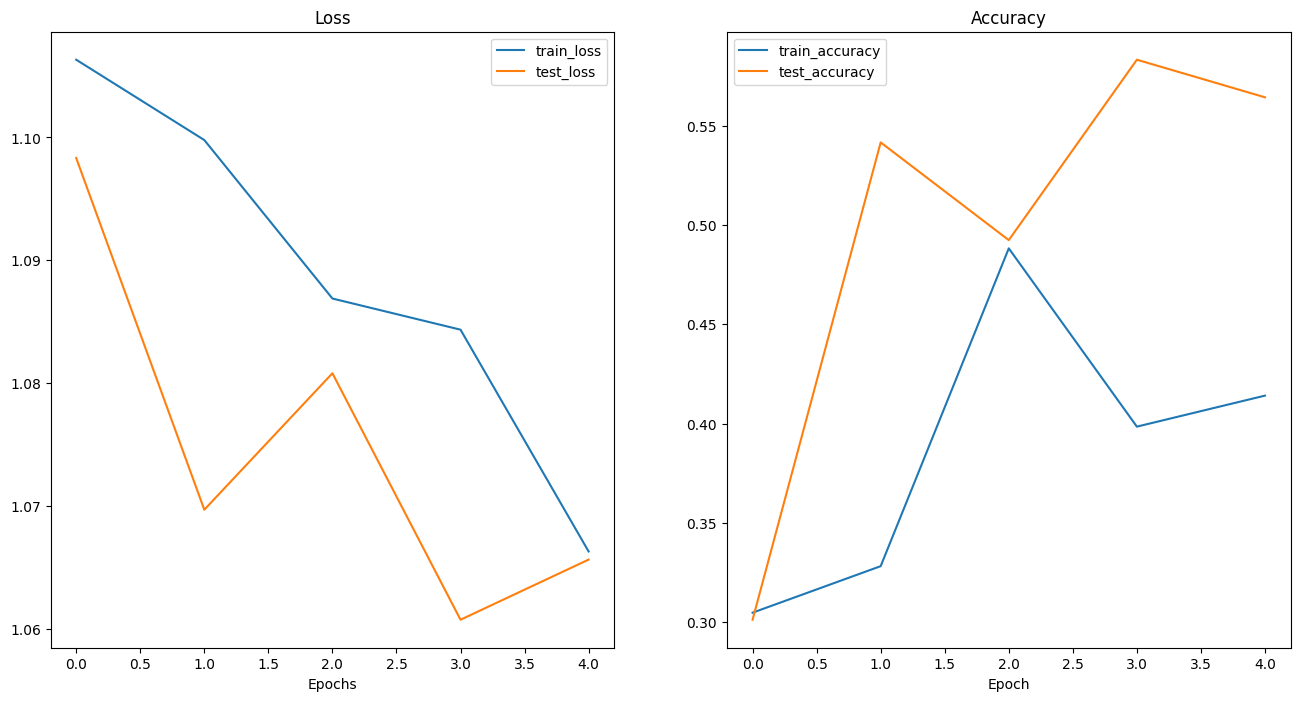

In [73]:
## call function
plot_loss_curves(model_0_results)

Summary
* The ideal loss curve is to see gradual descent of the loss curve over time.
* The ideal accuracy we obviously want to see this go up over time.

## 8. What should an ideal loss curve look like?

* A loss curve is one of the most helpful ways to troubleshoot a model.
* Generally speaking there are 3 main classes of loss curves:

1. **Underfitting**
* The loss could be lower.
* The model has to learn more!

2. **Overfitting**
* Opposite of underfitting, the model "memorized" the training data too well!
  * Example would be memorizing material for a test but not being able to apply this to the test or real-world problems.
* Train loss is lower than test loss.

3. **Just Right**
* We want the training loss to reduce as much as the test loss.
* Usually the train loss is less than the test set because the model has seen the train data before.


### Examples of Each Loss Curve
* [source](https://medium.com/@shravyagogula/understand-the-deep-learning-curves-for-model-hyper-tuning-19ae2c41b883)

1. Underfitting

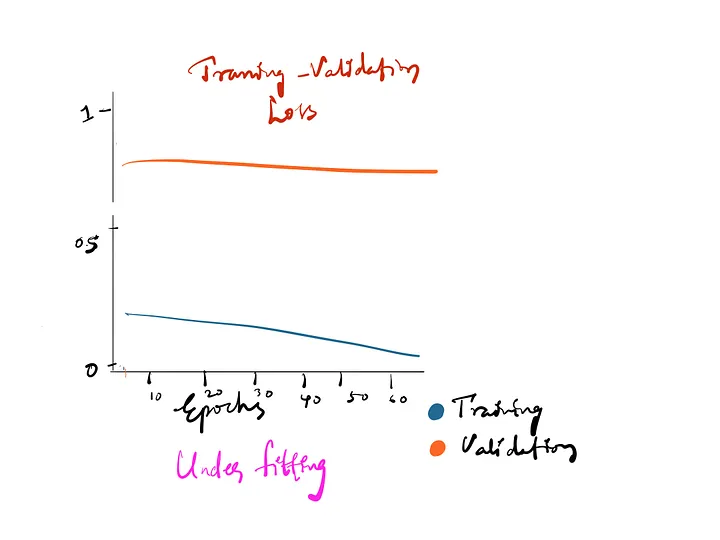

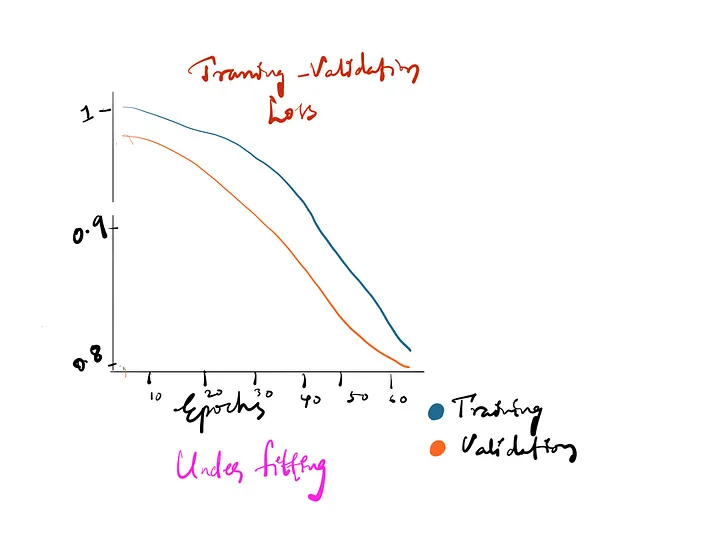

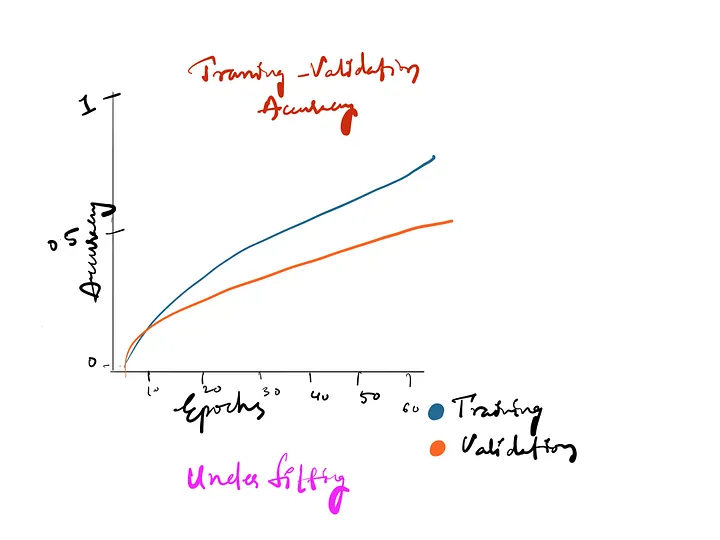

2. Overfitting

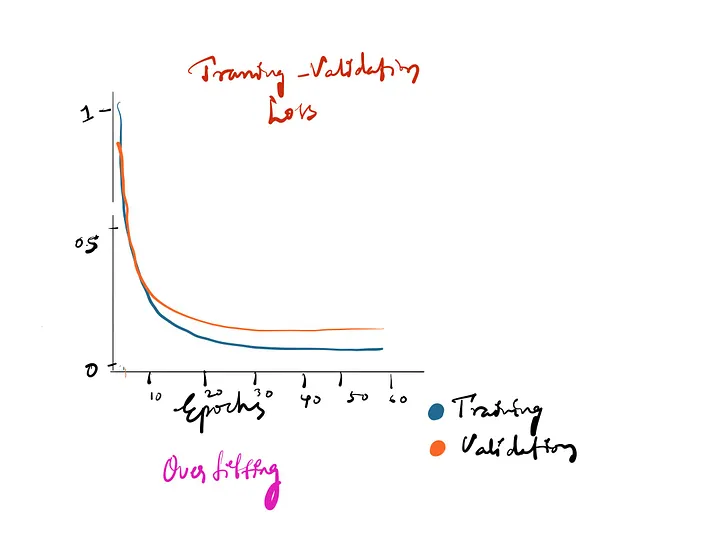

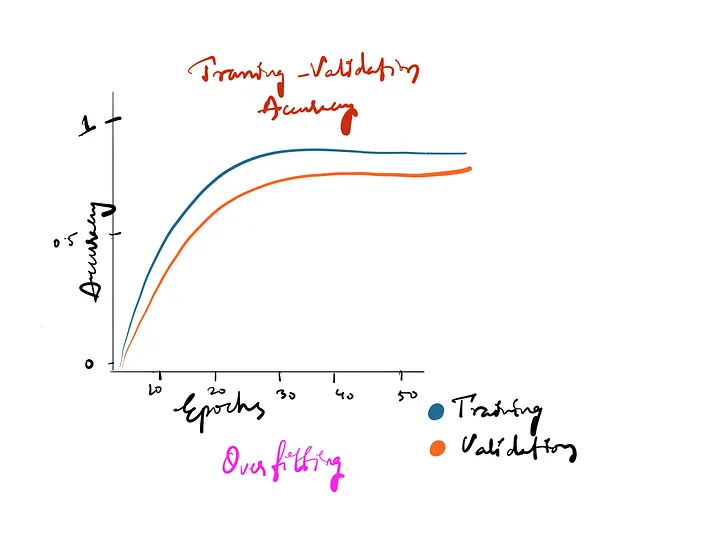

* Good source from Weights & Biases: https://wandb.ai/mostafaibrahim17/ml-articles/reports/A-Deep-Dive-Into-Learning-Curves-in-Machine-Learning--Vmlldzo0NjA1ODY0

3. Oscillating or Zig Zag Loss Curves
* If both the training curve and validation curves are oscillating, it means the ML model **could NOT learn any patterns from your training data.**

* If your model is not able to learn any patterns, it will very unlikely be able to predict patterns it has not seen before in validation or real-world data.
  * The result would be random predictions as we see in the "zig-zag" or oscillations from the loss curve.

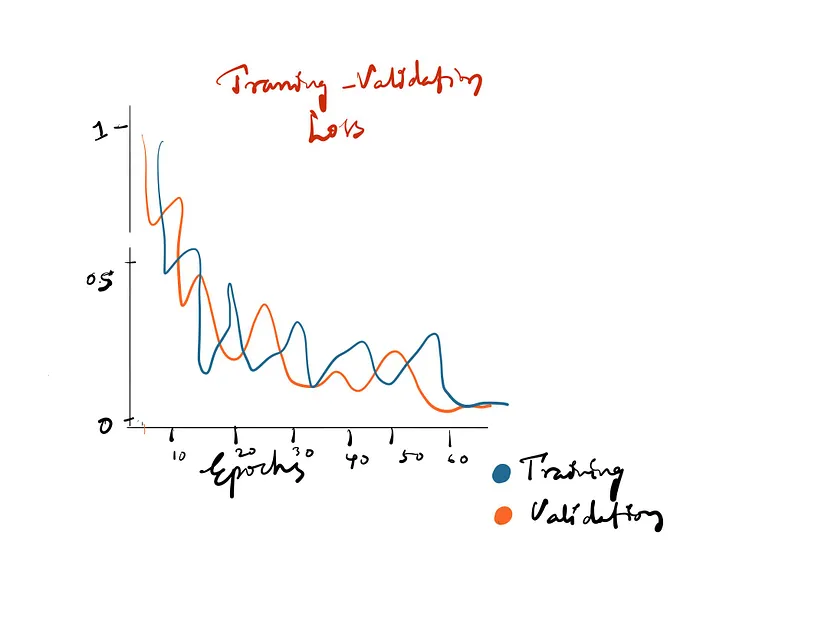

* However, if the training loss curve is improving and the validation curve is zigzag or oscillating, this means the validation data DOES NOT adequately represent the data the model was trained on!
  * Example:
      * If you train a model a CNN model to predict pictures of Dogs, but then give it pictures of Zebras for validation data, it is not going to perform well.

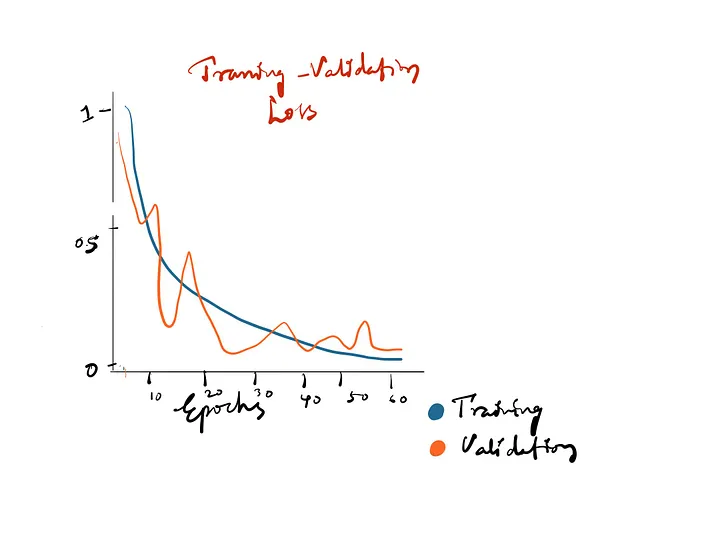

4. Redudant Data
* If there is duplication in your data or redudancy, the validation set may show a flatline as we see below where the model is essentially saying "hey this is too easy to predict".

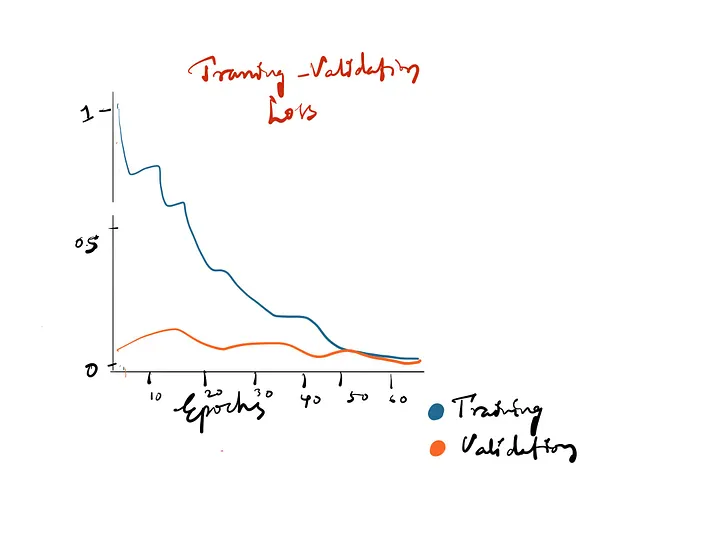

### How do we deal with Overfitting?
* There are numerous ways to handle overfitting in machine learning. This list below is from Daniel Bourke's PyTorch Bootcamp and is a general overview as there are many different approaches and combinations that you can try. Think of this as "cooking" where not every recipe will work everytime but these are possible solutions.

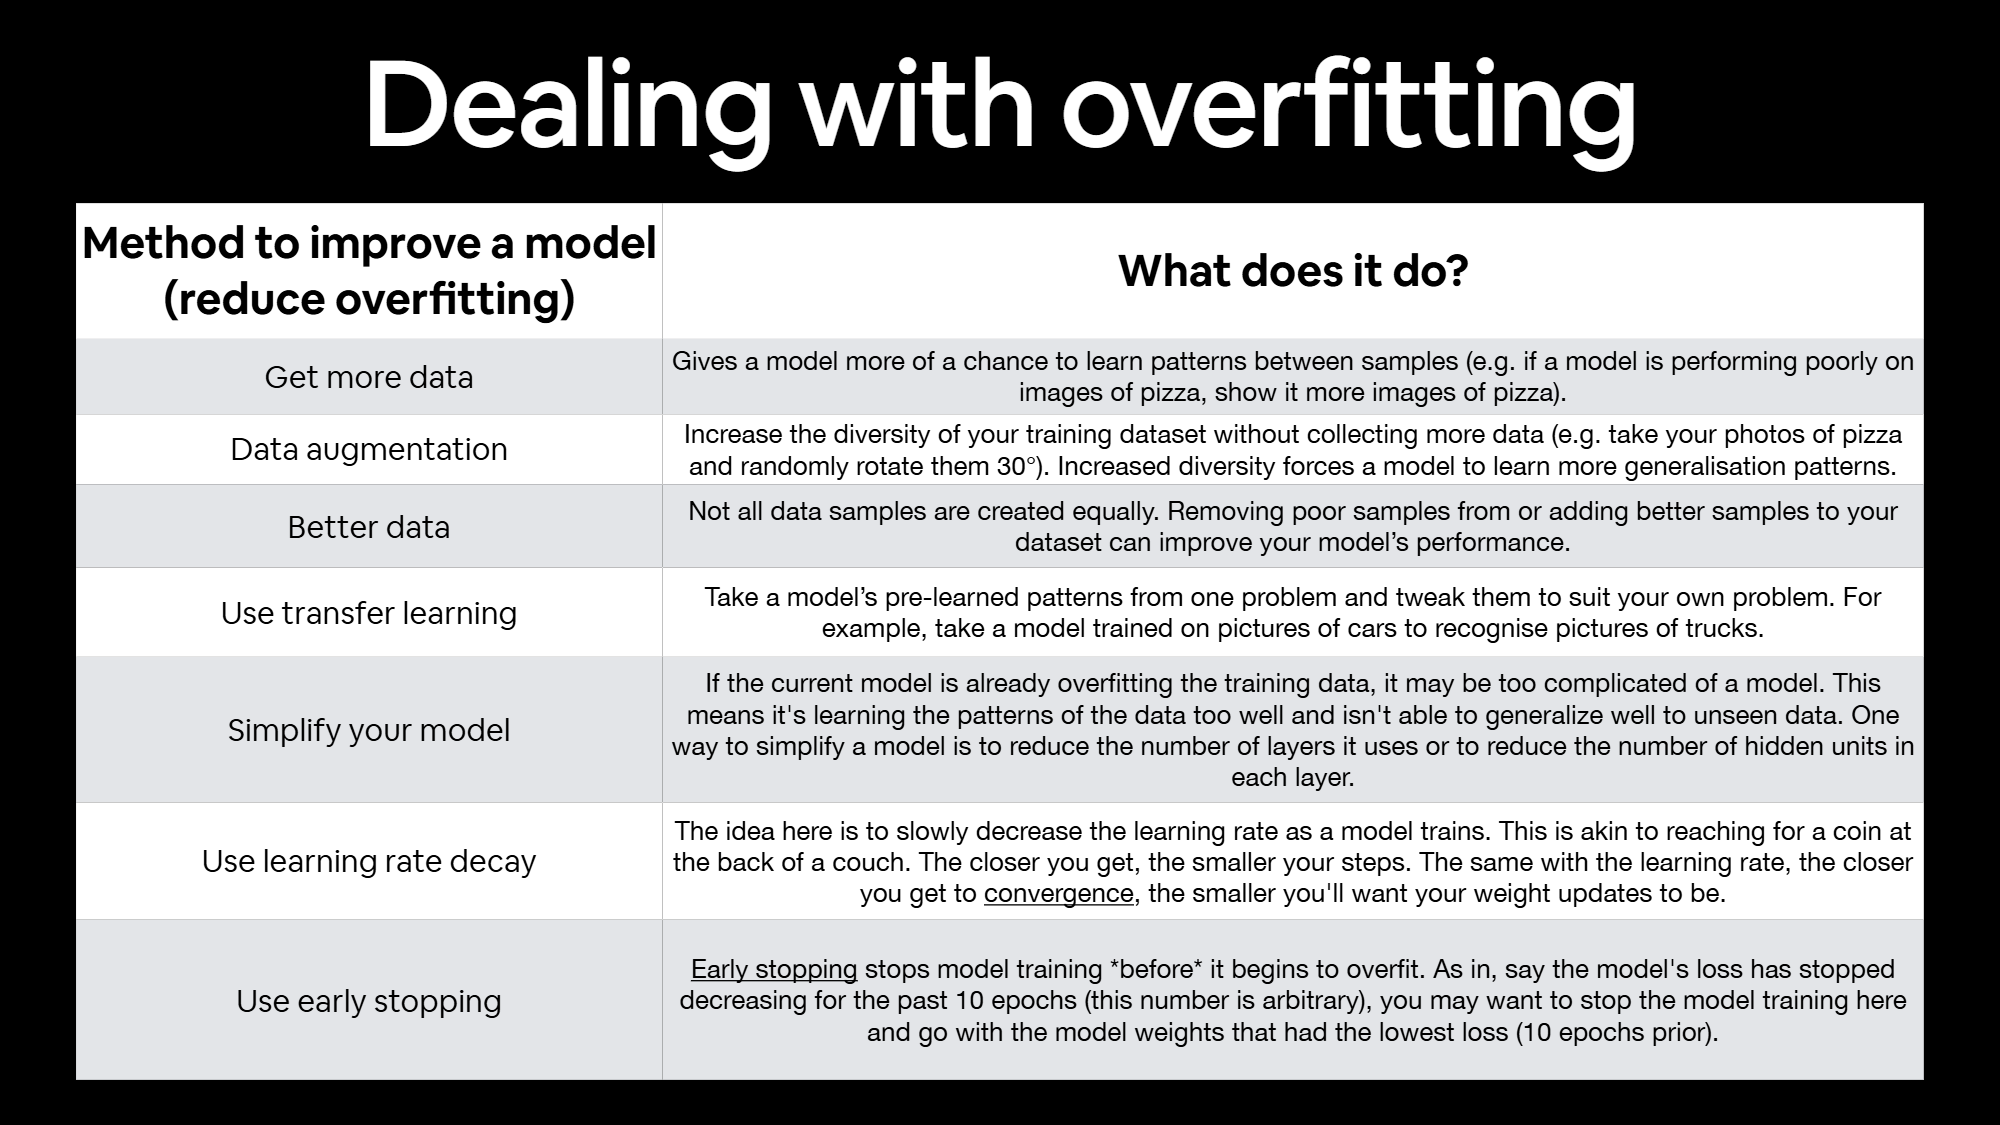

Here are some additional resources for Dealing with Overfitting:
1. https://medium.com/data-science/8-simple-techniques-to-prevent-overfitting-4d443da2ef7d
2. [Keeping Deep Learning Models in Check: A History-Based Approach to Mitigate Overfitting](https://arxiv.org/html/2401.10359v1)

### How do we deal with Underfitting?
* The chart below is from Daniel Bourke's PyTorch bootcamp. Again there are numerous approaches to handling Underfitting but this is a great overview.

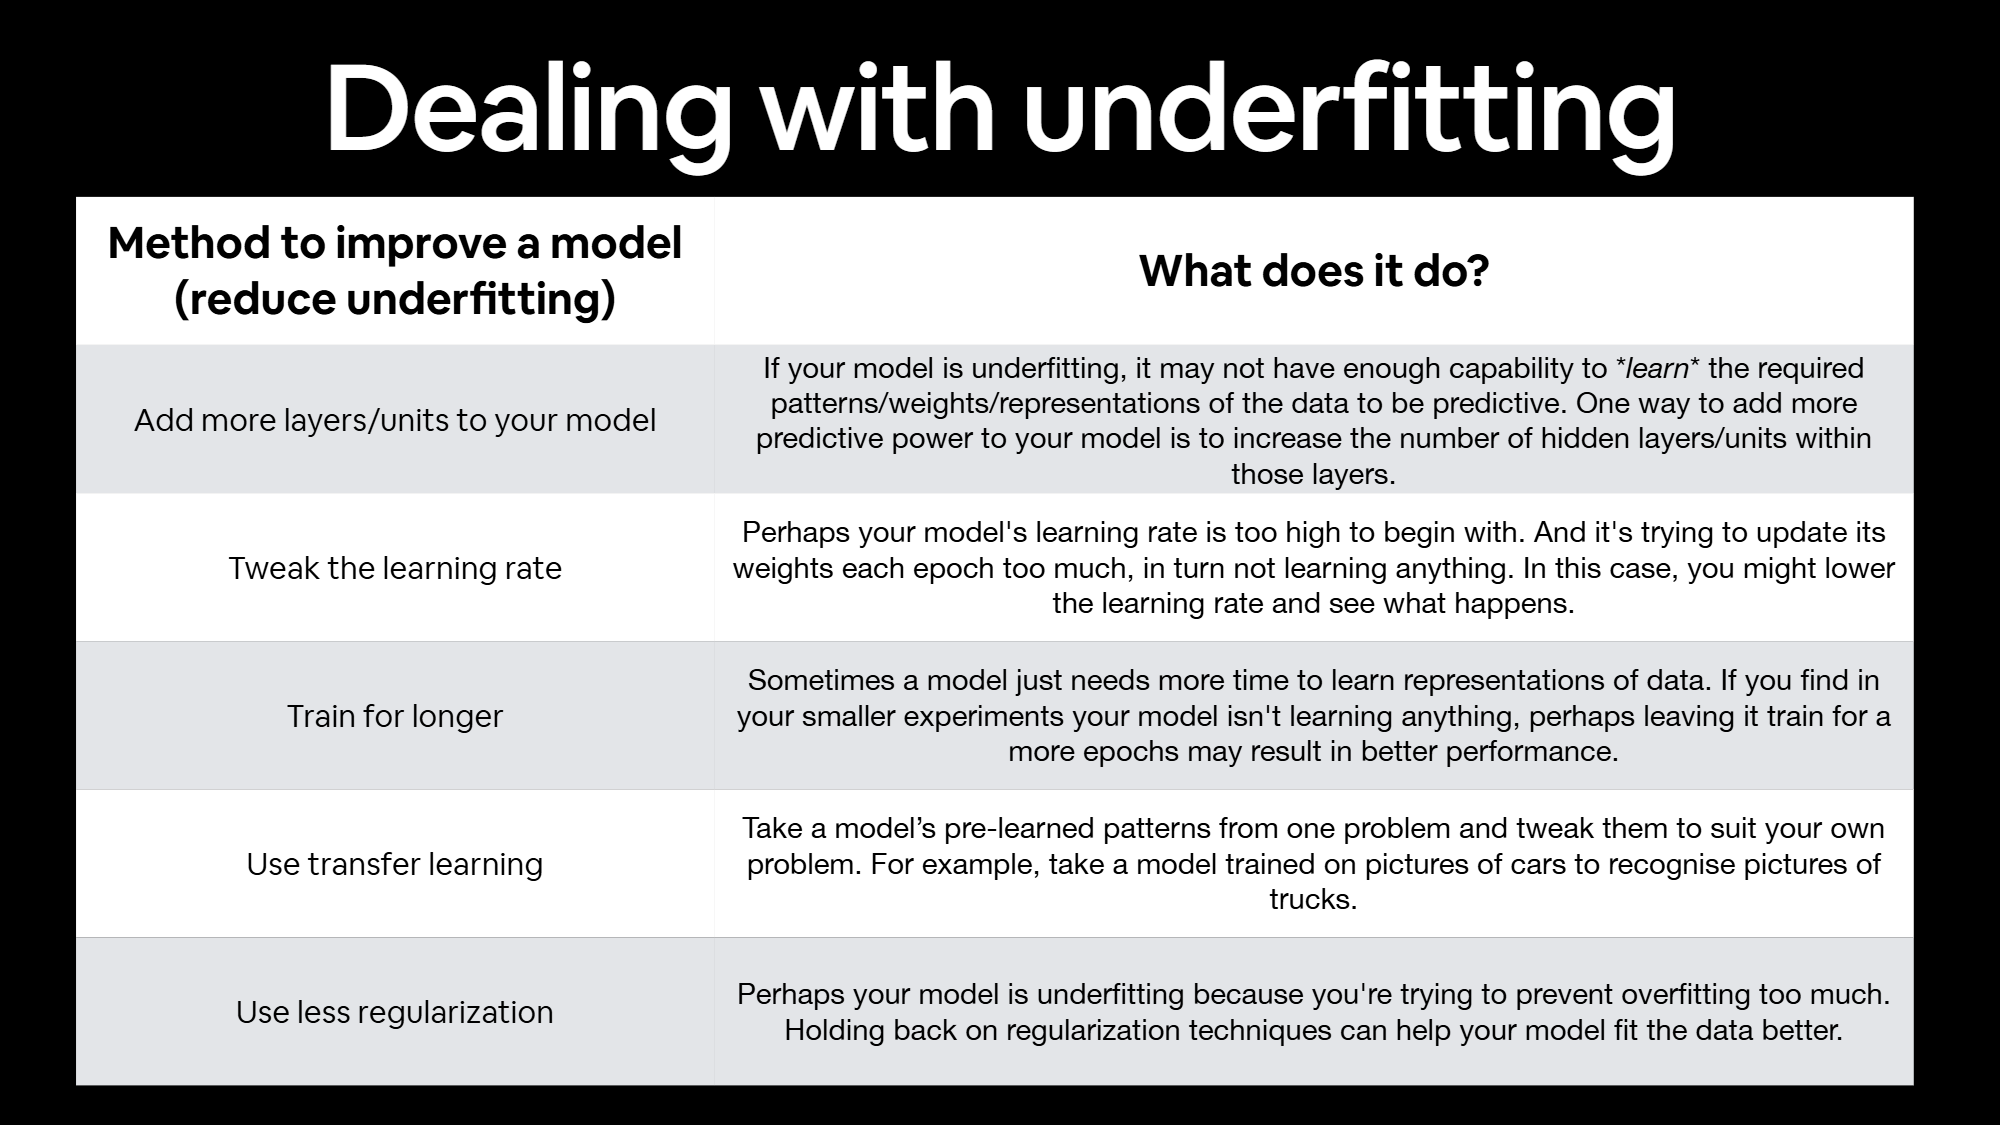

## 9. TinyVGG with Data Augmentation
* This is one method to handle **overfitting**.
* The concept is to artificially augment images for the model to learn more patterns in the training data.


### 9.1 Create transform with data augmentation
* We are using `TrivialAugmentWide` which does the following:
1. Dataset size on disk remains the unchanged, but the number of **unique images seen by the model during training effectively increases due to the augmentations.**
2. The model can then generalize better on unseen data by exposing it to a **wider variety of data.** -- hence the term **wide**

#### Key Features of TrivialAugmentWide
* [source](https://github.com/ravina01/Pytorch_Deep_Learning)

1. **No Tuning**
  * Other augmentation methods require extensive hyperparameter tuning to pinpoint the optimal augmentations
  * However, `TrivialAugmentWide` DOES NOT need any tuning!!
  * This simplifies the augmentation process by removing the need for manual adjustments.

2. **Random Augmentation**
  * Automatically applies a **single random augmentation operation to each image**
  * This is chosen from a set of **predefined augmentations.**
  * The intensity of the augmentation randomized.

3. **Broad Range of Operations**
  * Predefined set of augmentations includes a **wide variety of operations including but not limited to:
    * rotations
    * translations
    * flips
    * color adjustments
    * ..etc...
  * This will ensure the model is exposed to **diverse transformations during training**, improving its robustness and generalization.

In [74]:
# Create training transform with TrivialAugment
from torchvision import transforms

## train transform
train_transform_trivial = transforms.Compose([
                                              transforms.Resize(size=(64,64)),
                                              transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                              transforms.ToTensor(), ## images in tensor format
])
## test transform --> only resize image
## no augmentation needed on Test set
test_transform_simple = transforms.Compose([
                                              transforms.Resize(size=(64,64)),
                                              transforms.ToTensor(),
])

### 9.2 Create Train and Test `Dataset` and `DataLoader` with data augmentation

#### Create Datasets

In [75]:
## Turn image folders into Datasets
from torchvision import datasets

## train data -- using above `TrivialAugmentWide`
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

## test data
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

#### Create DataLoaders

In [76]:
## Turn datasets into DataLoaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

## set manual seed for reproducibility
torch.manual_seed(42)

## train dataloader
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

## test dataloader (no augmentation)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False, ## don't shuffle test set
                                    num_workers=NUM_WORKERS)

### 9.3 Construct and train model 1
* This time we'll be using the same model architecture except this time we are going to AUGMENT TRAINING DATA.

In [77]:
# Create model_1 and send to target device
torch.manual_seed(42)

## create model_1
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Now we have a model, Dataset, and DataLoaders.

Let's now create:
1. Loss function
2. Optimizer

Then we can call upon our `train()` function to evaluate our model.

In [78]:
# set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42) ## cuda seed

# set num of epochs
NUM_EPOCHS=5

# setup loss function (also called `criterion`)
loss_fn = nn.CrossEntropyLoss() ## multi-class classification

## setup optimizer
optimizer = torch.optim.AdamW(params=model_1.parameters(),
                              lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model 1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)


# End the timer and print out how long it took
end_time = timer()
print(f"Total training time for model_1: {end_time - start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1049 | Train acc: 0.2500 | Test loss: 1.1019 | Test acc: 0.2604
Epoch: 1 | Train loss: 1.0807 | Train acc: 0.4258 | Test loss: 1.1260 | Test acc: 0.2604
Epoch: 2 | Train loss: 1.0710 | Train acc: 0.4258 | Test loss: 1.1591 | Test acc: 0.2604
Epoch: 3 | Train loss: 1.1249 | Train acc: 0.3047 | Test loss: 1.1580 | Test acc: 0.2604
Epoch: 4 | Train loss: 1.0870 | Train acc: 0.4297 | Test loss: 1.1559 | Test acc: 0.2917
Total training time for model_1: 5.232 seconds


In [79]:
!nvidia-smi

Wed Apr 30 00:17:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P0             26W /   70W |     208MiB /  15360MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [80]:
model_1_results

{'train_loss': [1.1049127131700516,
  1.0806788578629494,
  1.0710046663880348,
  1.1248930543661118,
  1.0869947522878647],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.4296875],
 'test_loss': [1.1019256909688313,
  1.1259845892588298,
  1.15910671154658,
  1.157956024010976,
  1.1559230883916218],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2916666666666667]}

### 9.4 Plot loss curves of model 1
* A loss curve helps you evaluate your model's performance over time.
* This is also a great visualization of underfitting vs. overfitting.

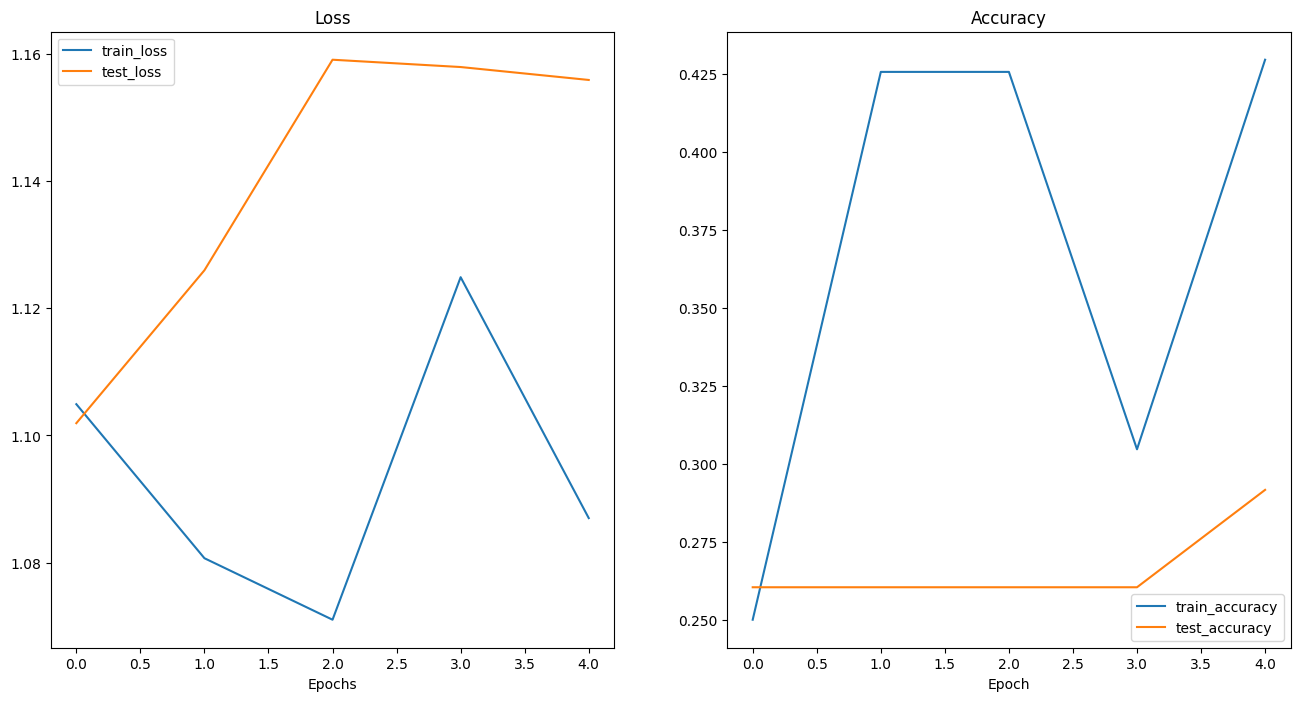

In [81]:
## plot the loss curves
plot_loss_curves(model_1_results)

Summary
* Is the model underfitting or overfitting?
* It appears it is doing BOTH.

1. Underfitting --> loss could be lower
2. Overfitting --> test loss is HIGHER than training loss.
  * e.g. the model memorized the training data and thus the train loss is much lower and model performs poorly on test data

## 10. Compare Model Results

After evaluating our model experiments on their own, we should compare them to each other.

Here is how we can do this:
1. Hard coding (what we are doing)

2. PyTorch + Tensorboard
* https://pytorch.org/docs/stable/tensorboard.html

3. Weights & Biases
* https://wandb.ai/site/

4. MLFlow
* https://mlflow.org/

In [82]:
import pandas as pd

## create dataframe for model results
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.106318   0.304688   1.098319  0.301136
1    1.099784   0.328125   1.069711  0.541667
2    1.086892   0.488281   1.080812  0.492424
3    1.084357   0.398438   1.060762  0.583333
4    1.066315   0.414062   1.065653  0.564394

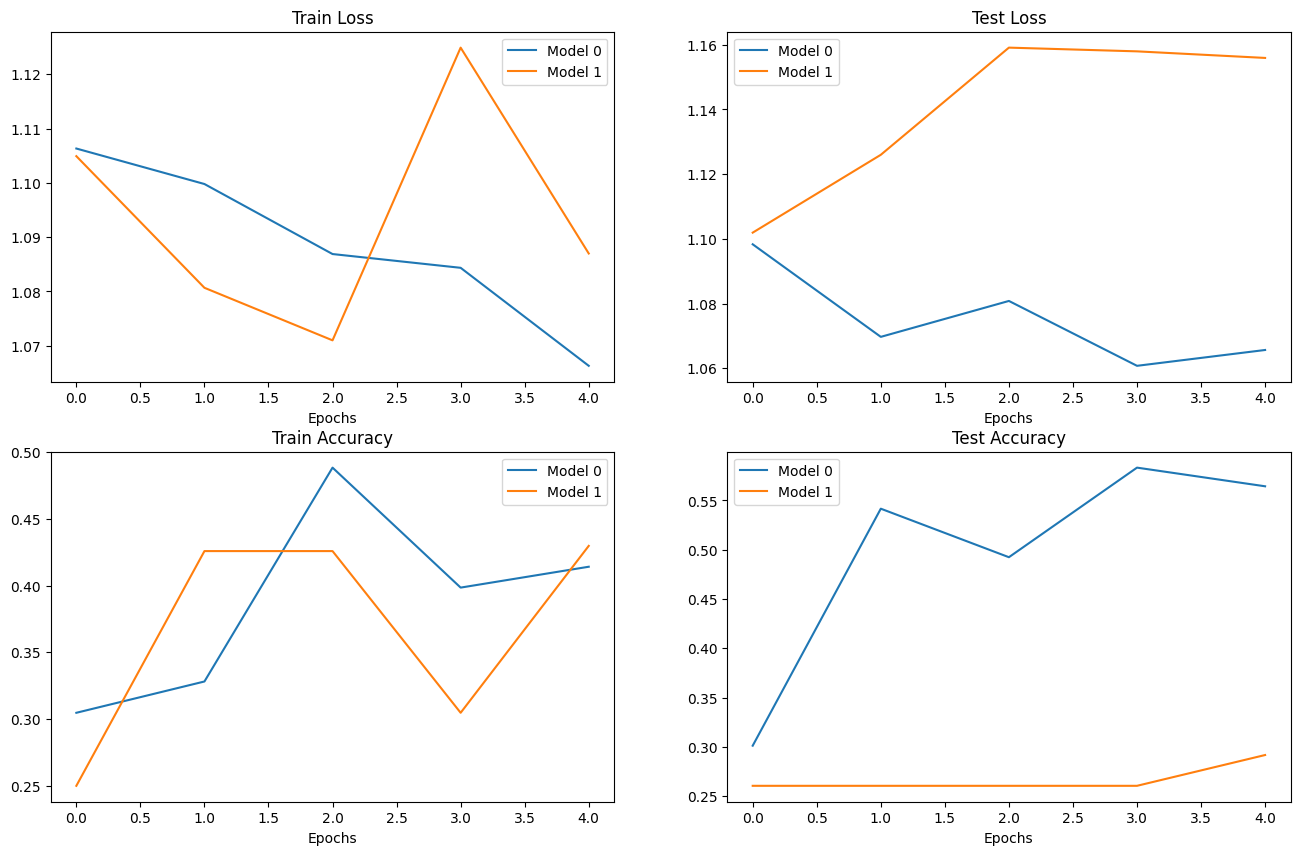

In [83]:
# setup plot
plt.figure(figsize=(16, 10))

# get number of epochs
epochs = range(len(model_0_df))

## Plot Loss
# plot train loss
plt.subplot(2, 2, 1) ## index 1 train loss
plt.plot(epochs, model_0_df['train_loss'], label="Model 0")
plt.plot(epochs, model_1_df['train_loss'], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend();

# plot test loss
plt.subplot(2, 2, 2) ## index 2 test loss
plt.plot(epochs, model_0_df['test_loss'], label="Model 0")
plt.plot(epochs, model_1_df['test_loss'], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend();



## Plot accuracy
# plot train accuracy
plt.subplot(2, 2, 3) ## index 3 train accuracy
plt.plot(epochs, model_0_df['train_acc'], label="Model 0")
plt.plot(epochs, model_1_df['train_acc'], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend();

# plot test loss
plt.subplot(2, 2, 4) ## index 4 test accuracy
plt.plot(epochs, model_0_df['test_acc'], label="Model 0")
plt.plot(epochs, model_1_df['test_acc'], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();


Summary
* It appears that model 1 is overfitting significantly as seen in the Test Loss plot.
  * It seems that data augmentation may not have been the best approach.

## 11. Making prediction on custom image

Although we have trained a model on custom data, how do we make a prediction on unseen or real world data the model has not seen yet?

Let's download an original image and predict what it is.



In [84]:
## set path of image to download
new_image_path = "https://pequodspizza.com/wp-content/uploads/2019/01/pequods-pizza.jpg"

In [85]:
# download custom image
import requests

# setup custom image path
custom_image_path = data_path / "pequods-pizza.jpg"

# download the image if it doesn't already exist in directory
if not custom_image_path.is_file():
  # open file path -- write binary
  with open(custom_image_path, "wb") as f:
    # get raw github file link
    request = requests.get(new_image_path)
    print(f"Downloading {custom_image_path}...")
    # write content of file
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download...")

### 11.1 Loading in custom image with PyTorch
* We have to make sure our custom image is in same format as the data our model was trained on.
* This means:
  1. Tensor format with dtype `torch.float32`
  2. Shape of 64x64
  3. On right device (cpu vs. GPU)

* We can read image into PyTorch using: https://pytorch.org/vision/0.19/generated/torchvision.io.read_image.html

In [86]:
type(custom_image_path)

pathlib.PosixPath

In [87]:
custom_image_path

PosixPath('data/pequods-pizza.jpg')

Note: `custom_image_path` is a `PosixPath` and not a string. We will have to transform to string to load with torchvision.

In [88]:
import torchvision


# read in custom image --> read in `uint8` format
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path)) # Convert PosixPath to string
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[222, 222, 222,  ..., 195, 194, 194],
         [222, 222, 222,  ..., 200, 199, 198],
         [222, 222, 222,  ..., 209, 208, 208],
         ...,
         [116, 115, 112,  ...,  73,  72,  71],
         [117, 116, 113,  ...,  72,  71,  70],
         [118, 117, 114,  ...,  71,  70,  69]],

        [[203, 203, 203,  ..., 190, 189, 189],
         [203, 203, 203,  ..., 197, 196, 195],
         [203, 203, 203,  ..., 208, 207, 207],
         ...,
         [ 54,  53,  50,  ...,  37,  36,  35],
         [ 55,  54,  51,  ...,  36,  35,  34],
         [ 56,  55,  52,  ...,  35,  34,  33]],

        [[209, 209, 209,  ..., 197, 196, 196],
         [209, 209, 209,  ..., 204, 203, 202],
         [209, 209, 209,  ..., 214, 213, 213],
         ...,
         [ 39,  38,  35,  ...,  41,  40,  39],
         [ 40,  39,  36,  ...,  40,  39,  38],
         [ 41,  40,  37,  ...,  39,  38,  37]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 1920, 1920])
Custom image dtyp

Summary
* The `TinyVGG` model was trained on images of size 64x64, but notice this image is much larger in size.
  * We will need to resize this image to 64x64 using a torch transform to match our model input size.
* Also, the dtype is currently `torch.unit8`.

#### Plot image

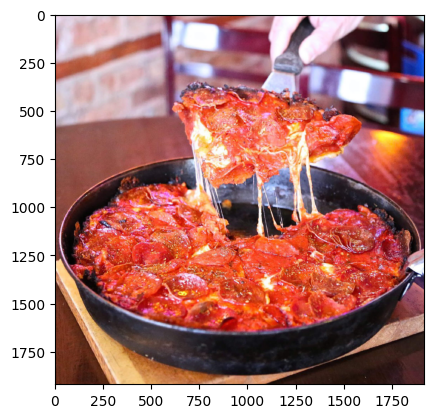

In [89]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))

Summary
* We loaded an image of Pequod's deep dish pizza from Chicago.

### 11.2 Making prediction on custom image with trained PyTorch model

In [90]:
## Try to make prediction on image on uint8 format
### model in eval mode
model_1.eval()
## turn off gradient descent
with torch.inference_mode():
  ### forward pass
  model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [91]:
# load in custom image and convert to `torch.float32`
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image

tensor([[[222., 222., 222.,  ..., 195., 194., 194.],
         [222., 222., 222.,  ..., 200., 199., 198.],
         [222., 222., 222.,  ..., 209., 208., 208.],
         ...,
         [116., 115., 112.,  ...,  73.,  72.,  71.],
         [117., 116., 113.,  ...,  72.,  71.,  70.],
         [118., 117., 114.,  ...,  71.,  70.,  69.]],

        [[203., 203., 203.,  ..., 190., 189., 189.],
         [203., 203., 203.,  ..., 197., 196., 195.],
         [203., 203., 203.,  ..., 208., 207., 207.],
         ...,
         [ 54.,  53.,  50.,  ...,  37.,  36.,  35.],
         [ 55.,  54.,  51.,  ...,  36.,  35.,  34.],
         [ 56.,  55.,  52.,  ...,  35.,  34.,  33.]],

        [[209., 209., 209.,  ..., 197., 196., 196.],
         [209., 209., 209.,  ..., 204., 203., 202.],
         [209., 209., 209.,  ..., 214., 213., 213.],
         ...,
         [ 39.,  38.,  35.,  ...,  41.,  40.,  39.],
         [ 40.,  39.,  36.,  ...,  40.,  39.,  38.],
         [ 41.,  40.,  37.,  ...,  39.,  38.,  37.]]]

In [92]:
custom_image.shape

torch.Size([3, 1920, 1920])

Summary
* We can see 2 things above:
1. The tensor values are NOT between 0 and 1 as our model was trained on.
2. The image size/shape is much larger than 64x64.

* To fix this we can divide it by `255.` which is the standard image format of `0 to 255` for RBG color channels.

In [93]:
# load in custom image and convert to `torch.float32`
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image

tensor([[[0.8706, 0.8706, 0.8706,  ..., 0.7647, 0.7608, 0.7608],
         [0.8706, 0.8706, 0.8706,  ..., 0.7843, 0.7804, 0.7765],
         [0.8706, 0.8706, 0.8706,  ..., 0.8196, 0.8157, 0.8157],
         ...,
         [0.4549, 0.4510, 0.4392,  ..., 0.2863, 0.2824, 0.2784],
         [0.4588, 0.4549, 0.4431,  ..., 0.2824, 0.2784, 0.2745],
         [0.4627, 0.4588, 0.4471,  ..., 0.2784, 0.2745, 0.2706]],

        [[0.7961, 0.7961, 0.7961,  ..., 0.7451, 0.7412, 0.7412],
         [0.7961, 0.7961, 0.7961,  ..., 0.7725, 0.7686, 0.7647],
         [0.7961, 0.7961, 0.7961,  ..., 0.8157, 0.8118, 0.8118],
         ...,
         [0.2118, 0.2078, 0.1961,  ..., 0.1451, 0.1412, 0.1373],
         [0.2157, 0.2118, 0.2000,  ..., 0.1412, 0.1373, 0.1333],
         [0.2196, 0.2157, 0.2039,  ..., 0.1373, 0.1333, 0.1294]],

        [[0.8196, 0.8196, 0.8196,  ..., 0.7725, 0.7686, 0.7686],
         [0.8196, 0.8196, 0.8196,  ..., 0.8000, 0.7961, 0.7922],
         [0.8196, 0.8196, 0.8196,  ..., 0.8392, 0.8353, 0.

Summary
* Ok now all tensor values are between 0 and 1.
* Lets plot the image.

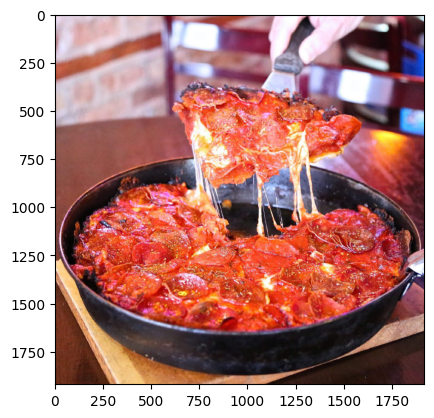

In [94]:
## plot image --> permute image to use matplotlib
plt.imshow(custom_image.permute(1, 2, 0));

Summary
* We were able to plot the image but we can see it is still very large in size, more than 64x64.
* The problem we have to deal with now is resizing the image to fit our model. We can do this with a transform pipeline.

In [95]:
# Create transform pipeline to resize image --> to match data size model was trained on
from torchvision import transforms
custom_image_transform = transforms.Compose([
                                            transforms.Resize(size=(64,64)) # same size TinyVGG model was trained on
])
## Transform target image
custom_image_transformed = custom_image_transform(custom_image)


# print out shapes
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 1920, 1920])
Transformed shape: torch.Size([3, 64, 64])


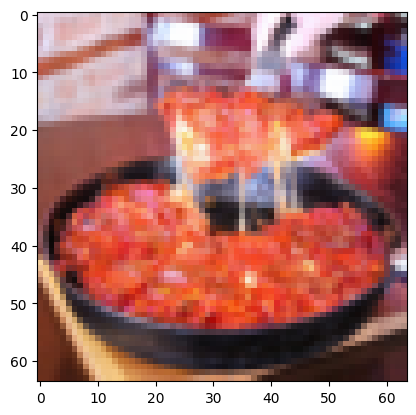

In [96]:
## plot transformed image
plt.imshow(custom_image_transformed.permute(1, 2, 0))

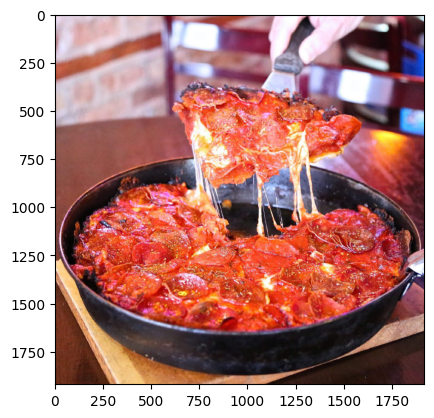

In [97]:
## compare to original image size
plt.imshow(custom_image.permute(1,2,0))

In [98]:
## check shape
custom_image.shape

torch.Size([3, 1920, 1920])

In [99]:
## lets see the transformed shape
custom_image_transformed.shape

torch.Size([3, 64, 64])

Summary
* We can see the transformed image is VERY PIXELATED which may not result in optimal predictions with our trained model. What can we do?
* What if instead we tried size 224x224?

In [100]:
# Create transform pipeline to resize image --> to match data size model was trained on
from torchvision import transforms
custom_image_transform = transforms.Compose([
                                            transforms.Resize(size=(224, 224))
])
## Transform target image
custom_image_transformed = custom_image_transform(custom_image)


# print out shapes
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 1920, 1920])
Transformed shape: torch.Size([3, 224, 224])


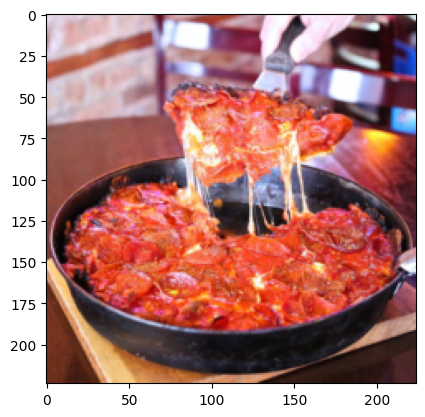

In [101]:
## now plot image with incrased size transform
plt.imshow(custom_image_transformed.permute(1, 2, 0))

Summary
* That is an image that is more clearer than the original 64x64 transform.

Ok, let's revert back to the 64x64 shape which is the same size the original model was trained on and try a prediction again.

In [102]:
# Create transform pipeline to resize image --> to match data size model was trained on
from torchvision import transforms
custom_image_transform = transforms.Compose([
                                            transforms.Resize(size=(64,64)) # same size TinyVGG model was trained on
])
## Transform target image
custom_image_transformed = custom_image_transform(custom_image)


# print out shapes
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 1920, 1920])
Transformed shape: torch.Size([3, 64, 64])


In [103]:
## Try to make prediction on image on uint8 format
## this will error --> image not on right device!!!
### model in eval mode
model_1.eval()
## turn off gradient descent
with torch.inference_mode():
  ### forward pass
  custom_image_pred = model_1(custom_image_transformed)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper_CUDA___slow_conv2d_forward)

In [104]:
## Try to make prediction on image on uint8 format
### model in eval mode
### This will error --> no BATCH_SIZE
model_1.eval()
## turn off gradient descent
with torch.inference_mode():
  ### forward pass
  custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [105]:
## unsqueeze on 1st dimensions and check shape
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [106]:
## lets try to predict again with BATCH_SIZE
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

tensor([[ 0.0885,  0.0239, -0.2019]], device='cuda:0')

In [107]:
## class names
class_names

['pizza', 'steak', 'sushi']

### Custom Data -- Pearls for making predictions with a custom trained model
* Note, to make prediction on custom image we had to:

1. Load image and turn into tensor
2. Make sure image was same dtype as model (`torch.float32`)
3. Make sure same image was same shape as data the model was trained on which is 3x64x64 with a BATCH_SIZE....(1,3,64,64)
4. Make sure image is on same device as model (e.g. cpu vs. GPU)


* **Reminder in Deep Learning**
  * The 3 most common errors in deep learning are:

  1. Wrong datatypes
  2. Wrong data shapes
  3. Wrong devices

In [108]:
# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3724, 0.3491, 0.2785]], device='cuda:0')

In [109]:
# convert pred probs --> pred labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1).cpu() # put on cpu
custom_image_pred_label

tensor([0])

In [110]:
## index class names?
class_names[custom_image_pred_labels]

NameError: name 'custom_image_pred_labels' is not defined

Summary
* The model predicts pizza.

### 11.3 Putting custom image predictions together: building a function

Ideal outcome:

* A function where we pass an image path to and have our model predict on that image and plot the image + prediction.

In [115]:
## custom function to predict and plot
def pred_plot_image(model: torch.nn.Module,
                    image_path: str,
                    class_names: List[str] = None,
                    transform=None,
                    device=device):
  """
  Makes prediction on target image with trained model and plots image & prediction.
  """
  ## 1. load target image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  ## 2. divide image pixel values by 255 to get between [0, 1]
  target_image = target_image / 255.

  ## 3. Transform data if necessary -- if transform exists
  if transform:
    target_image = transform(target_image)

  ## 4. make sure model on device
  model.to(device)

  ## 5. turn on eval/inference mode and make prediction
  model.eval()
  with torch.inference_mode():
    # Add an extra dimension to image --> this is batch dimension (e.g. our model will predict on batches of 1x image)
    target_image = target_image.unsqueeze(0)

    # make prediction on image with extra dimension -- raw logits
    target_image_pred = model(target_image.to(device)) #make sure target image on right device

    # convert raw logits -> pred probabilities
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # convert pred probabilities --> pred labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # plot image alongside prediction & pred probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove batch dimension and rearrange shape to be HWC (color channels last)
    if class_names:
      title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
      title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False) # turn axis off


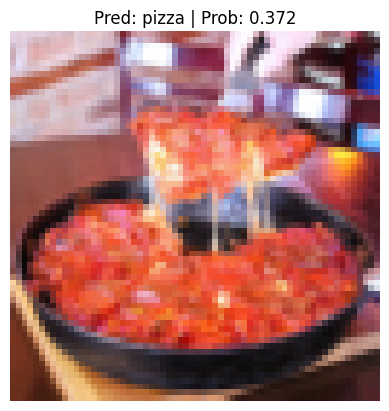

In [116]:
# Predict on custom image
pred_plot_image(model=model_1,
                image_path=custom_image_path,
                class_names=class_names,
                transform=custom_image_transform,
                device=device)

Summary
* This isn't a great prediction probability but it is correct that the image is pizza.
* We can also try other images to see if it can predict the 3 labels - pizza, steak, sushi.
* When predicting on custom data please remember:

1. Data in right dtype
2. Data on same device as model
3. Data in correct shape